In [ ]:
# !mv /content/Custom_NER_project /content/drive/MyDrive/NER_NLTK_Assignament

# **NoteBook-2. Model**(using NLTK-NER)

# Custom NER with NLTK

**Named Entity Recognition**

Using the provided labelled dataset, train a NER model to recognize Payment term Entity
using any ML/DL framework

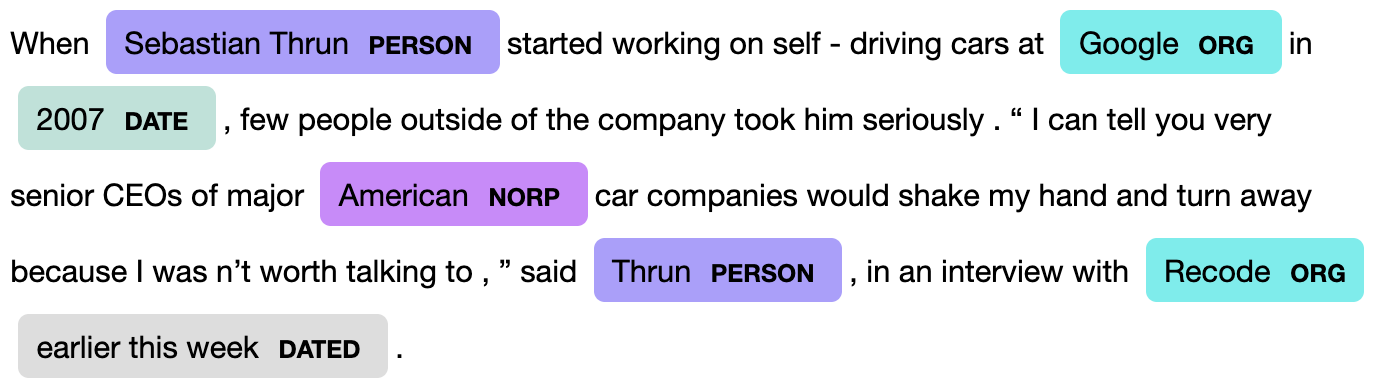

In [ ]:
# import libraries

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import nltk
from nltk.tag.stanford import StanfordNERTagger
from nltk.tokenize import word_tokenize

In [ ]:
# create folders
# !mkdir 'Custom_NER_project'
# !mkdir Custom_NER_project/stanford-ner-tagger
# !mkdir Custom_NER_project/stanford-ner-tagger/train

In [ ]:
# Getting Stanford-NER-tagger from official website
# English model
!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip

nltk.download('punkt')

--2022-09-16 12:26:44--  https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip [following]
--2022-09-16 12:26:44--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180358328 (172M) [application/zip]
Saving to: ‘stanford-ner-2018-10-16.zip’

stanford-ner-2018-1 100%[===================>] 172.00M  5.10MB/s    in 30s     

2022-09-16 12:27:14 (5.78 MB/s) - ‘stanford-ner-2018-10-16.zip’ saved [180358328/180358328]

Archive:  stanford-ner-2018-10-16.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# changing directory
os.chdir('/content/Custom_NER_project')

In [ ]:
# moving required files to OUR_directory
# NER
# English MOdel

In [ ]:
!mv /content/stanford-ner-2018-10-16/stanford-ner.jar /content/Custom_NER_project/stanford-ner-tagger/ner-tagger.jar

In [ ]:
!mv /content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz /content/Custom_NER_project/stanford-ner-tagger/ner-model-english.ser.gz

In [ ]:
# %%writefile /content/Custom_NER_project/stanford-ner-tagger/train/data.tsv
# 30 PAYMENT
# days PAYMENT
# thirty PAYMENT
# 30 PAYMENT
# days PAYMENT, 
# netthirty PAYMENT
# 30 PAYMENT
# days PAYMENT
# thirty PAYMENT
# 30days PAYMENT
# 30 PAYMENT
# days: PAYMENT
# thirty PAYMENT
# days PAYMENT
# forty-five PAYMENT
# 45 PAYMENT
# days PAYMENT
# forty-five PAYMENT 
# 450 PAYMENT
# days PAYMENT 
# 30 PAYMENT
# days. PAYMENT
# sixty PAYMENT
# 60 PAYMENT
# forty-five PAYMENT
# 45 PAYMENT
# days PAYMENT
# forty-five PAYMENT 
# 450 PAYMENT
# days PAYMENT
# NET PAYMENT
# 30 PAYMENT

In [ ]:
os.chdir('/content/Custom_NER_project/stanford-ner-tagger')

In [ ]:
%%writefile prop.txt
trainFile = train/data.tsv
serializeTo = custom_payment_ner_model.ser.gz
map = word=0,answer=1

useClassFeature=true
useWord=true
useNGrams=true
noMidNGrams=true
maxNGramLeng=6
usePrev=true
useNext=true
useSequences=true
usePrevSequences=true
maxLeft=1
useTypeSeqs=true
useTypeSeqs2=true
useTypeySequences=true
wordShape=chris2useLC
useDisjunctive=true

Overwriting prop.txt


# Training Custom Model

In [ ]:
!java -mx600m -cp "*:lib/*" edu.stanford.nlp.ie.crf.CRFClassifier -loadClassifier /content/Custom_NER_project/stanford-ner-tagger/ner-model-english.ser.gz -prop /content/Custom_NER_project/stanford-ner-tagger/prop.txt

Invoked on Fri Sep 16 12:28:25 UTC 2022 with arguments: -loadClassifier /content/Custom_NER_project/stanford-ner-tagger/ner-model-english.ser.gz -prop /content/Custom_NER_project/stanford-ner-tagger/prop.txt
useTypeSeqs2=true
noMidNGrams=true
trainFile=train/data.tsv
maxNGramLeng=6
maxLeft=1
serializeTo=custom_payment_ner_model.ser.gz
wordShape=chris2useLC
useDisjunctive=true
useClassFeature=true
useNGrams=true
useNext=true
usePrev=true
useTypeySequences=true
loadClassifier=/content/Custom_NER_project/stanford-ner-tagger/ner-model-english.ser.gz
usePrevSequences=true
useTypeSeqs=true
useSequences=true
map=word=0,answer=1
useWord=true
Loading classifier from /content/Custom_NER_project/stanford-ner-tagger/ner-model-english.ser.gz ... done [2.6 sec].
Serializing classifier to custom_payment_ner_model.ser.gz... done.


In [ ]:
!java -cp "/content/Custom_NER_project/stanford-ner-tagger/ner-tagger.jar:lib/*" -mx4g edu.stanford.nlp.ie.crf.CRFClassifier -prop /content/Custom_NER_project/stanford-ner-tagger/prop.txt

Invoked on Fri Sep 16 12:38:31 UTC 2022 with arguments: -prop /content/Custom_NER_project/stanford-ner-tagger/prop.txt
useTypeSeqs2=true
noMidNGrams=true
trainFile=train/data.tsv
maxNGramLeng=6
maxLeft=1
serializeTo=custom_payment_ner_model.ser.gz
wordShape=chris2useLC
useDisjunctive=true
useClassFeature=true
useNGrams=true
useNext=true
usePrev=true
useTypeySequences=true
usePrevSequences=true
useTypeSeqs=true
useSequences=true
map=word=0,answer=1
useWord=true
numFeatures = 884
Time to convert docs to feature indices: 0.0 seconds
numClasses: 2 [0=O,1=PAYMENT]
numDocuments: 1
numDatums: 59
numFeatures: 884
Time to convert docs to data/labels: 0.0 seconds
numWeights: 2184
QNMinimizer called on double function of 2184 variables, using M = 25.
               An explanation of the output:
Iter           The number of iterations
evals          The number of function evaluations
SCALING        <D> Diagonal scaling was used; <I> Scaled Identity
LINESEARCH     [## M steplength]  Minpack linesea

In [ ]:
jar_engine = '/content/Custom_NER_project/stanford-ner-tagger/ner-tagger.jar'
model = '/content/Custom_NER_project/stanford-ner-tagger/custom_payment_ner_model.ser.gz'

In [ ]:
sentences = ["Payment shall be made within thirty (30) days following the end of each measurement period in default.",
'Coventry Company shall use best efforts to require Payors to pay Provider within thirty (30) days receipt of a claim that is accurate, complete, and otherwise in accordance with this section.',
'Customer will pay MetricStream in U.S. dollars within 45 days (Net 30 terms) of receipt of a correct invoice all undisputed charges and promptly notify MetricStream in writing of any disputed amount.']

In [ ]:
# load NER tagger with english model
entity_tagger = StanfordNERTagger(model, jar_engine,encoding='utf8')
#tokenize the sentences
for sentence in sentences:
  words = nltk.word_tokenize(sentence) 
  #use NER tagger on tokens
  tagged_entity = entity_tagger.tag(words)
  print(tagged_entity)

[('Payment', 'O'), ('shall', 'O'), ('be', 'O'), ('made', 'O'), ('within', 'O'), ('thirty', 'O'), ('(', 'O'), ('30', 'PAYMENT'), (')', 'O'), ('days', 'O'), ('following', 'O'), ('the', 'O'), ('end', 'O'), ('of', 'O'), ('each', 'O'), ('measurement', 'O'), ('period', 'O'), ('in', 'O'), ('default', 'O'), ('.', 'O')]
[('Coventry', 'O'), ('Company', 'O'), ('shall', 'O'), ('use', 'O'), ('best', 'O'), ('efforts', 'O'), ('to', 'O'), ('require', 'O'), ('Payors', 'O'), ('to', 'O'), ('pay', 'O'), ('Provider', 'O'), ('within', 'O'), ('thirty', 'O'), ('(', 'O'), ('30', 'PAYMENT'), (')', 'O'), ('days', 'O'), ('receipt', 'O'), ('of', 'O'), ('a', 'O'), ('claim', 'O'), ('that', 'O'), ('is', 'O'), ('accurate', 'O'), (',', 'O'), ('complete', 'O'), (',', 'O'), ('and', 'O'), ('otherwise', 'O'), ('in', 'O'), ('accordance', 'O'), ('with', 'O'), ('this', 'O'), ('section', 'O'), ('.', 'O')]
[('Customer', 'O'), ('will', 'O'), ('pay', 'O'), ('MetricStream', 'O'), ('in', 'O'), ('U.S.', 'O'), ('dollars', 'O'), ('wit

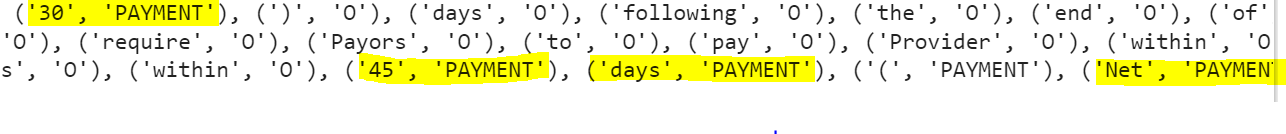

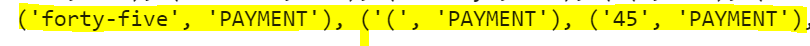